**World's Air Quality and Water Pollution Analysis**

We will import data from a csv file, cities_air_quality_water_pollution
.18-10-2021 (1).csv, and analyze the data to find the most polluted cities
in the world. Also, we will find the least polluted cities in the world.

In [70]:
import pandas as pd

pollution_data = pd.read_csv('air_water_pollution.csv')

pollution_data.head(10)

,City,"""Region""","""Country""","""AirQuality""","""WaterPollution"""
0,New York City,"""New York""","""United States of America""",46.816038,49.504950
1,"Washington, D.C.","""District of Columbia""","""United States of America""",66.129032,49.107143
2,San Francisco,"""California""","""United States of America""",60.514019,43.000000
3,Berlin,"""""","""Germany""",62.364130,28.612717
4,Los Angeles,"""California""","""United States of America""",36.621622,61.299435
5,Bern,"""Canton of Bern""","""Switzerland""",94.318182,12.500000
6,Geneva,"""Canton of Geneva""","""Switzerland""",71.538462,17.372881
7,Zurich,"""Canton of Zurich""","""Switzerland""",83.809524,10.714286
8,Basel,"""""","""Switzerland""",81.666667,26.923077
9,London,"""England""","""United Kingdom""",37.042254,40.716374


Checking for data types in the dataset.

In [71]:
pollution_data.dtypes

City                  object
 "Region"             object
 "Country"            object
 "AirQuality"        float64
 "WaterPollution"    float64
dtype: object

Checking for null values in the dataset.

In [72]:
pollution_data.isnull().sum()

City                 0
 "Region"            0
 "Country"           0
 "AirQuality"        0
 "WaterPollution"    0
dtype: int64

As per above output there are no null values in the dataset.

Check for duplicates.

In [73]:
pollution_data.duplicated().sum()

0

0 shows no duplicates in the data. So, we can proceed further.

**Creating a scatterplot for Air Quality index**

The Scatterplot will enable us to visualize the Air Quality Index of the
cities in the dataset. It will be rainbow color form where the highest city 
will be in red color and the lowest city will be in violet color.

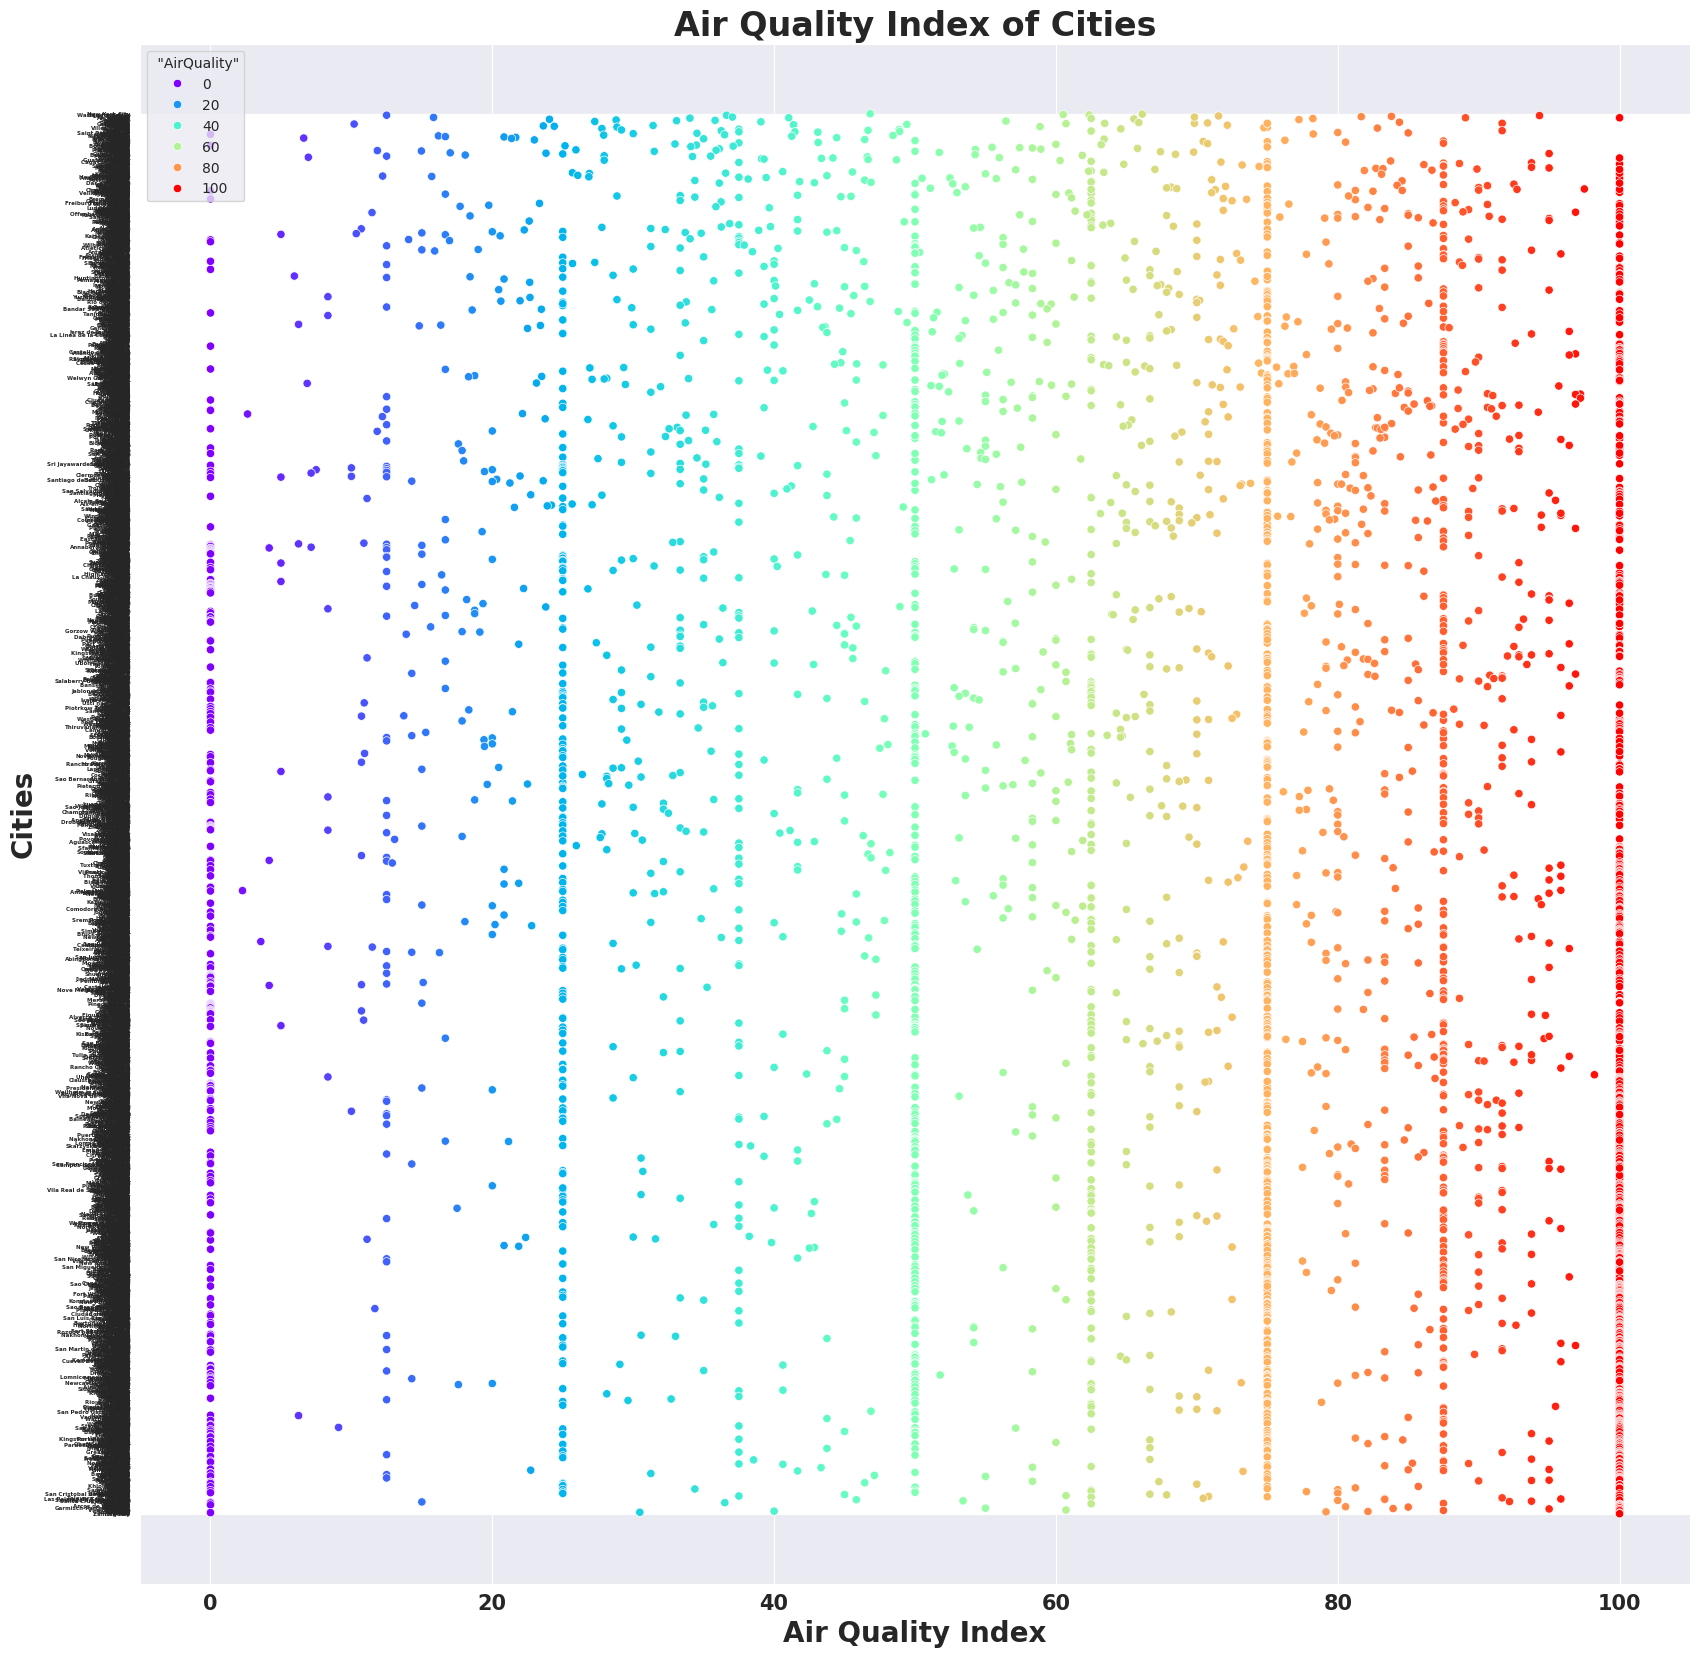

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20))

sns.scatterplot(data = pollution_data, x=pollution_data[" \"AirQuality\""],
                y="City", hue=pollution_data[" \"AirQuality\""],
                palette="rainbow")
plt.xlabel("Air Quality Index", fontsize=20, fontweight="bold")
plt.ylabel("Cities", fontsize=20, fontweight="bold")
plt.title("Air Quality Index of Cities", fontsize=24, fontweight="bold")
plt.xticks(fontsize=15, fontweight="bold")
plt.yticks(fontsize=4, fontweight="bold")

plt.show()

This data is so huge hence not that visible especially the cities with
highest and lowest Air Quality Index. So, we will create a barplot to
visualize the data in a better way.

/home/billy/Documents/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


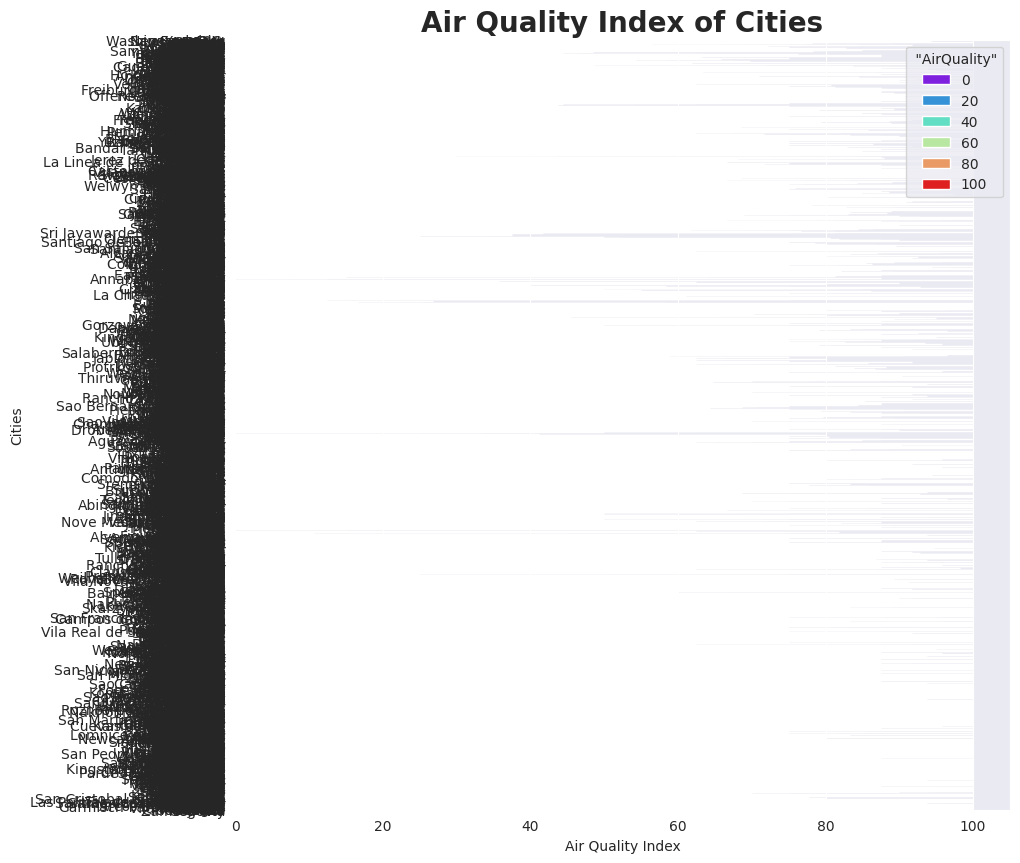

In [75]:
plt.figure(figsize=(10, 10))

sns.barplot(data = pollution_data, x=pollution_data[" \"AirQuality\""],
            y="City",hue = pollution_data[" \"AirQuality\""],
            palette="rainbow")
plt.xlabel("Air Quality Index")
plt.ylabel("Cities")
plt.title("Air Quality Index of Cities", fontsize=20, fontweight="bold")
plt.show()

**Creating a scatterplot for Water Quality index**

The Scatterplot will enable us to visualize the Water Quality Index just
 like the air quality index.

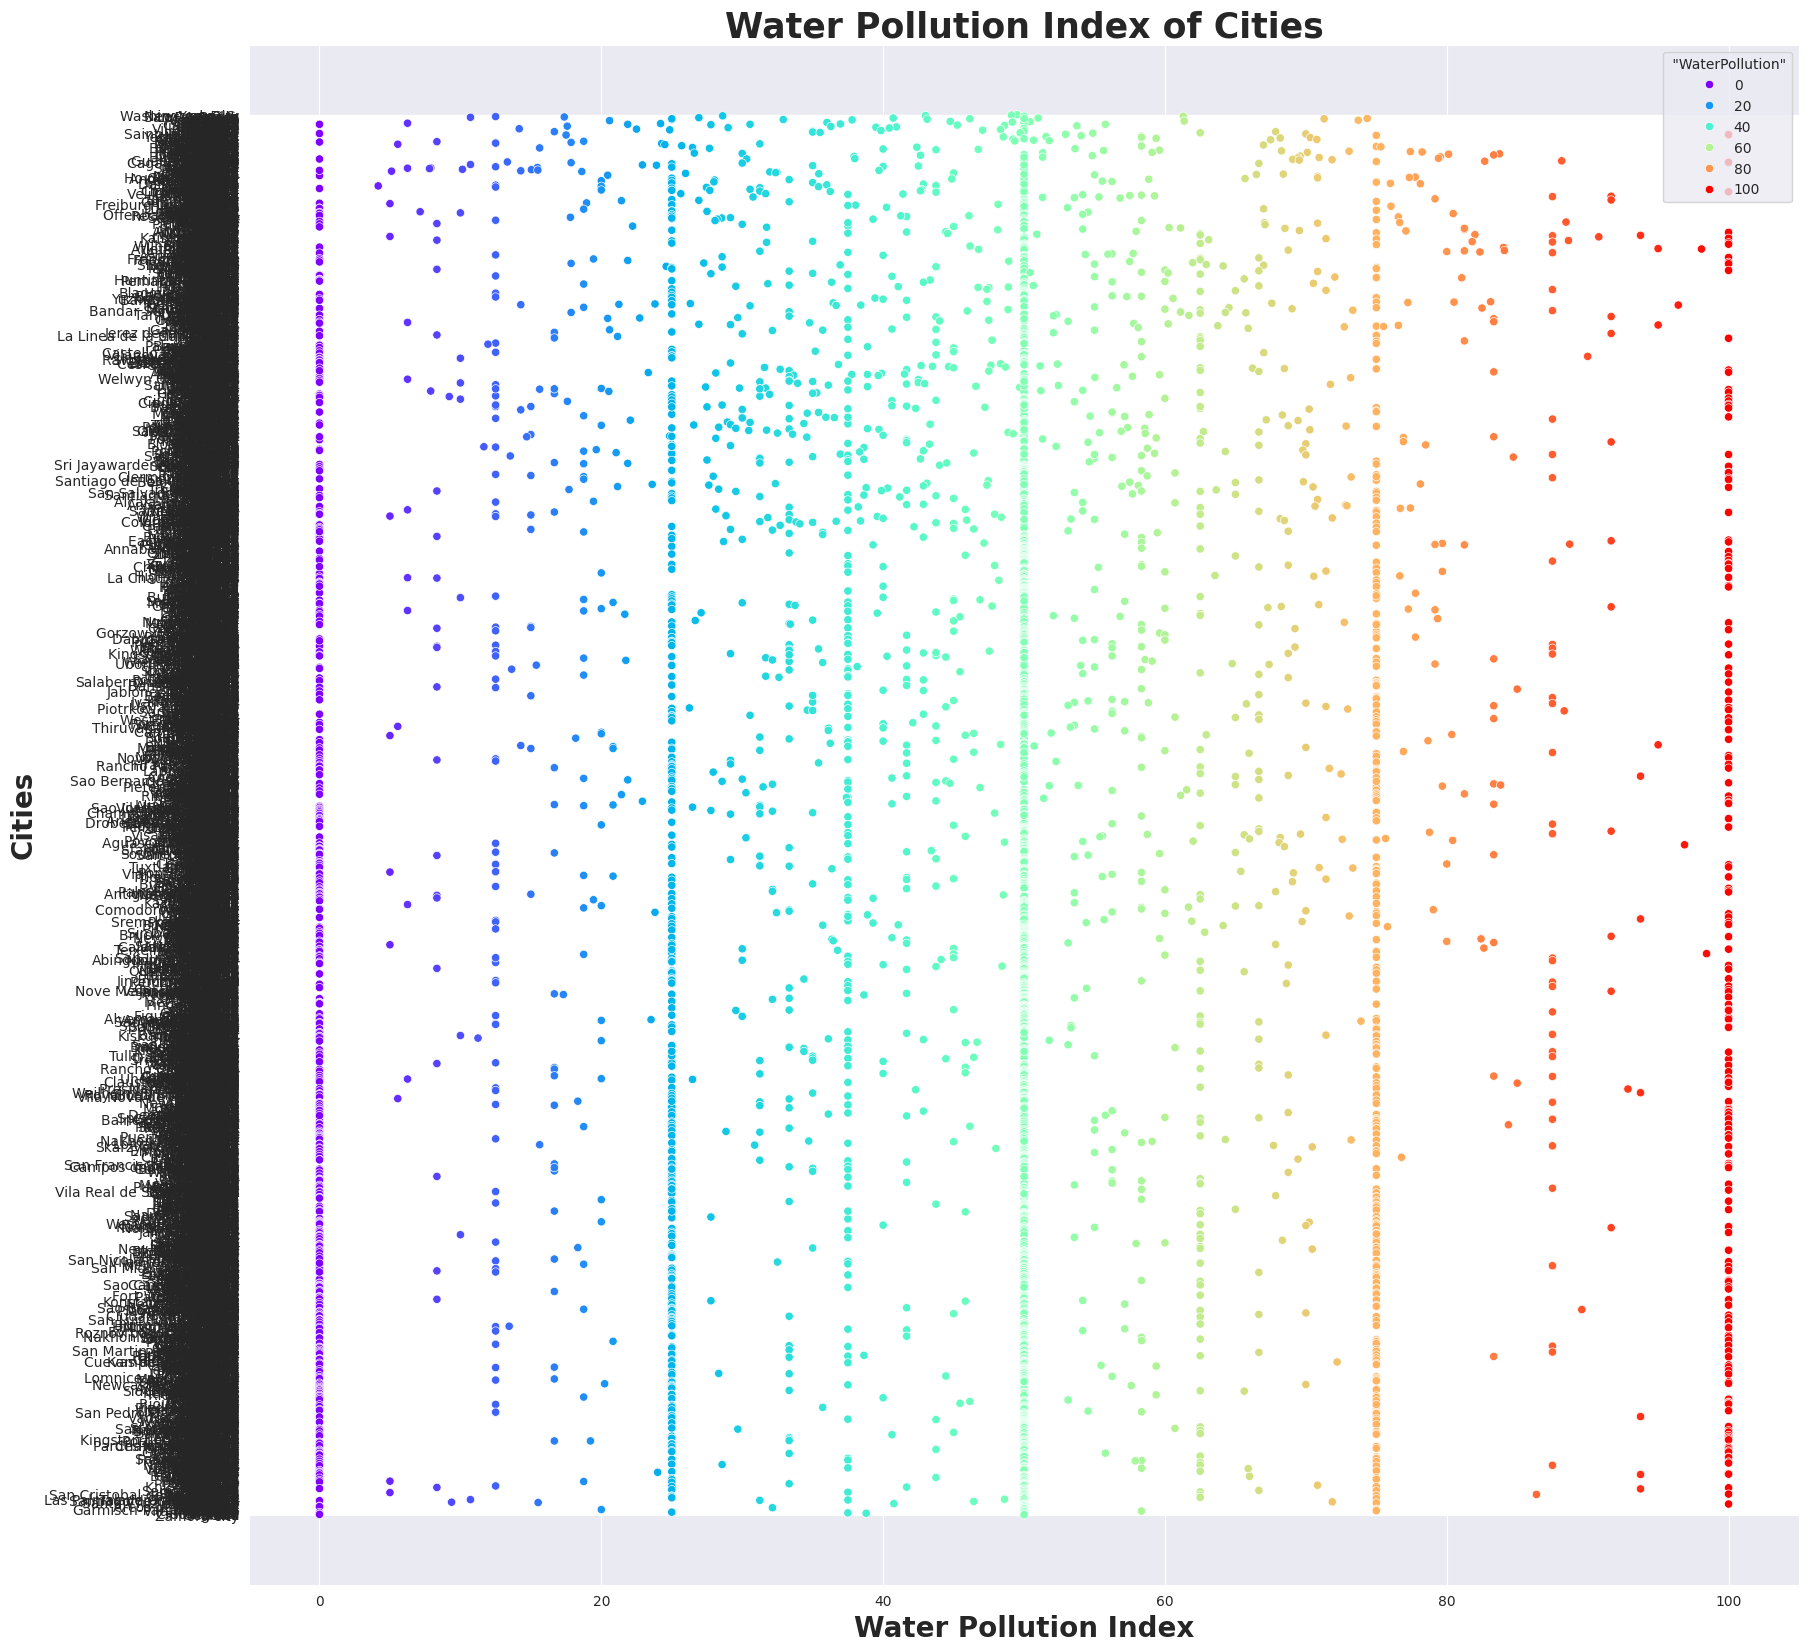

In [76]:
plt.figure(figsize=(20, 20))

sns.scatterplot(data = pollution_data, x=pollution_data[" \"WaterPollution\""],
                y="City", hue=pollution_data[" \"WaterPollution\""],
                palette="rainbow")
plt.xlabel("Water Pollution Index", fontsize=20, fontweight="bold")
plt.ylabel("Cities", fontsize=20, fontweight="bold")    
plt.title("Water Pollution Index of Cities", fontsize=25, fontweight="bold")
plt.show()

**Model Selection**

We will use KMeans clustering algorithm to cluster the data into 2 clusters.

In [78]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(pollution_data[['\"AirQuality\"', '\"WaterPollution\"']])

pollution_data['cluster'] = kmeans.predict(pollution_data[['\"AirQuality\"', '\"WaterPollution\"']])

pollution_data.head()

KeyError: 'None of [Index([\'"AirQuality"\', \'"WaterPollution"\'], dtype=\'object\')] are in the [columns]'